In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [44]:
def sine_wave(x, amplitude, frequency, offset):
    return amplitude*np.sin( frequency * x + offset)

In [52]:
initial_guess = [3.,0.035, 30]
x_data = np.arange(1000)
working_dat = np.load("/home/ldoyle/notebooks/channel_drift_5_min_clips/rad_4_smoothed_decimated_normalized_5_min_start_South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T231114Z.npy")
scaler_val = np.std(working_dat)
working_dat = working_dat/scaler_val
y_data= working_dat[:1000,890]
# Fit the data using curve_fit
popt, _ = curve_fit(sine_wave, x_data, y_data, p0=initial_guess)
amplitude_fit, frequency_fit, offset_fit = popt

In [55]:
print(amplitude_fit)
print(frequency_fit)
print(offset_fit)

1.8455343300798186
0.03263220536556954
30.497366983939934


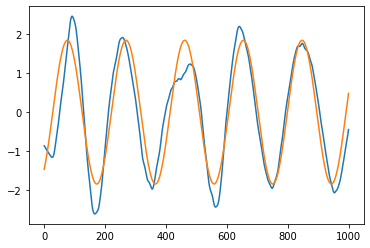

In [54]:
plt.plot(x_data, working_dat[:1000,890])
plt.plot(x_data, sine_wave(x_data,amplitude_fit,frequency_fit,offset_fit))
plt.show()

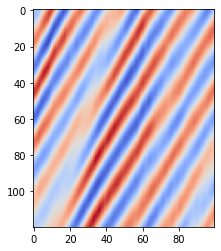

In [56]:
plt.imshow(working_dat[:1000:10,890:2090:10].T,cmap="coolwarm")
plt.show()

In [36]:
working_dat.shape

(5000, 6000)

In [39]:
from scipy.io import savemat
mdic = {"dat": working_dat[:1000,890]}
# savemat("/home/ldoyle/notebooks/initial_cond_sample_100.mat",mdic)